In [1]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load the data
sales=r"C:\Users\vyshn\Downloads\retail_sales_dataset.csv"
sales_data=pd.read_csv(sales)
sales_data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [5]:
sales=r"C:\Users\vyshn\Downloads\retail_sales_dataset.csv"
sales_data=pd.read_csv(sales)
sales_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [7]:
# seperating categorical and numerical columns
cat=sales_data.select_dtypes(include='object').columns
num=sales_data.select_dtypes(exclude='object').columns
cat,num

(Index(['Date', 'Customer ID', 'Gender', 'Product Category'], dtype='object'),
 Index(['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount'], dtype='object'))

In [9]:
# shape of the data
sales_data.shape

(1000, 9)

In [11]:


sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [13]:
sales_data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [15]:
sales_data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [17]:
sales_data['Quantity'].describe()

count    1000.000000
mean        2.514000
std         1.132734
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Quantity, dtype: float64

In [19]:
sales_gender=sales_data.groupby(['Gender'],as_index=False)['Quantity'].sum()
sales_gender

,Gender,Quantity
0,Female,1298
1,Male,1216


In [27]:
sales_data.corr(numeric_only=True)

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
Transaction ID,1.000000,0.065191,-0.026623,-0.060837,-0.075034
Age,0.065191,1.000000,-0.023737,-0.038423,-0.060568
Quantity,-0.026623,-0.023737,1.000000,0.017501,0.373707
Price per Unit,-0.060837,-0.038423,0.017501,1.000000,0.851925
Total Amount,-0.075034,-0.060568,0.373707,0.851925,1.000000


In [33]:
# Data Cleaning
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [35]:
# Sales Overview
total_sales = sales_data['Total Amount'].sum()
total_transactions = sales_data['Transaction ID'].nunique()
average_transaction_value = sales_data['Total Amount'].mean()

print(f'Total Sales: {total_sales}')
print(f'Total Transactions: {total_transactions}')
print(f'Average Transaction Value: {average_transaction_value}')


Total Sales: 456000
Total Transactions: 1000
Average Transaction Value: 456.0


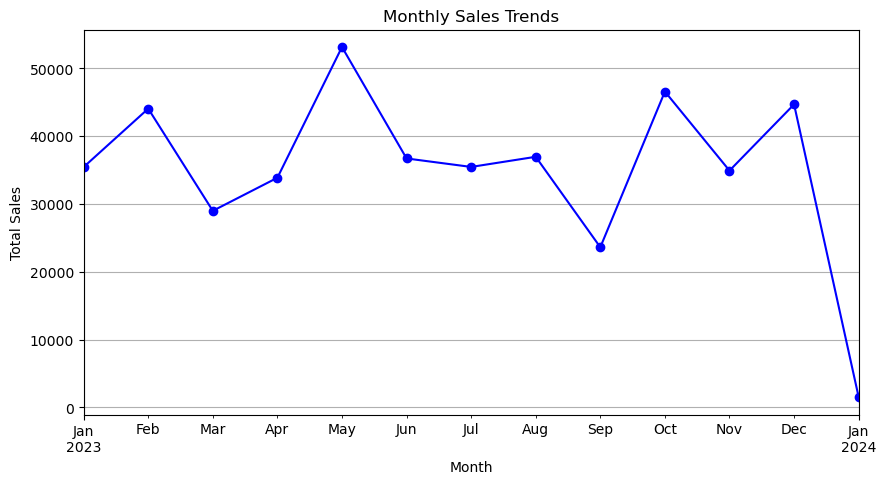

In [37]:
# Monthly Sales Trends
sales_data['Month'] = sales_data['Date'].dt.to_period('M')
monthly_sales = sales_data.groupby('Month')['Total Amount'].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [39]:
# Product Performance
product_revenue = sales_data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
product_quantity = sales_data.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)

print('Top Products by Revenue:')
print(product_revenue.head())
print('\nTop Products by Quantity Sold:')
print(product_quantity.head())




Top Products by Revenue:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

Top Products by Quantity Sold:
Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64


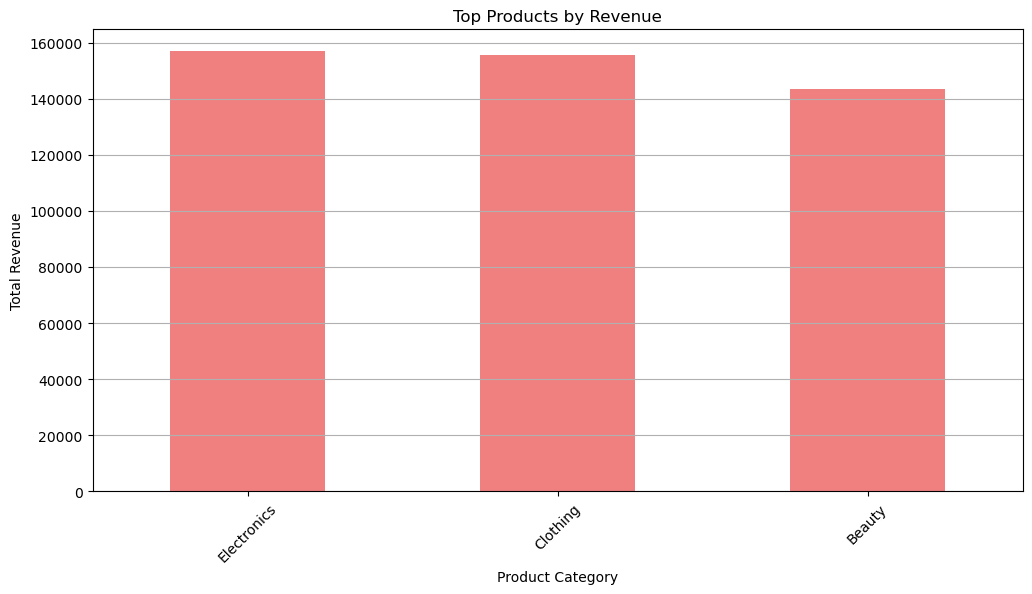

In [41]:
# Plot Product Performance by Revenue
plt.figure(figsize=(12, 6))
product_revenue.plot(kind='bar', color='lightcoral')
plt.title('Top Products by Revenue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



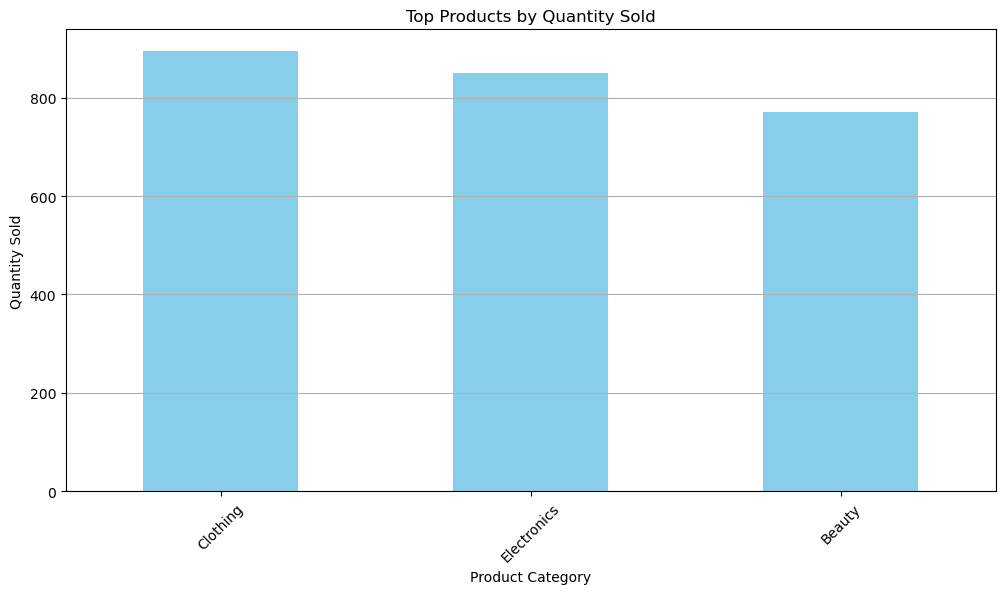

In [43]:
# Plot Product Performance by Quantity Sold
plt.figure(figsize=(12, 6))
product_quantity.plot(kind='bar', color='skyblue')
plt.title('Top Products by Quantity Sold')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [49]:
# Identify Most Sold Product in Each Transaction
most_sold_product = sales_data.groupby('Transaction ID')['Product Category'].apply(lambda x: x.mode()[0])
sales_data = sales_data.merge(most_sold_product.rename('Most Sold Product'), on='Transaction ID')

print('\nUpdated Dataset with Most Sold Product:')
print(sales_data.head())




Updated Dataset with Most Sold Product:
   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount    Month Most Sold Product  
0         3              50           150  2023-11            Beauty  
1         2             500          1000  2023-02          Clothing  
2         1              30            30  2023-01       Electronics  
3         1             500           500  2023-05          Clothing  
4         2              50           100  2023-05            Beauty  


In [53]:
# Customer Segmentation
customer_segment = sales_data.groupby('Customer ID').agg({
    'Total Amount': 'sum',
    'Transaction ID': 'count',
    'Quantity': 'sum'
}).rename(columns={
    'Total Amount': 'Total Spend',
    'Transaction ID': 'Total Transactions',
    'Quantity': 'Total Quantity'
})

print(customer_segment.head())


             Total Spend  Total Transactions  Total Quantity
Customer ID                                                 
CUST001              150                   1               3
CUST002             1000                   1               2
CUST003               30                   1               1
CUST004              500                   1               1
CUST005              100                   1               2


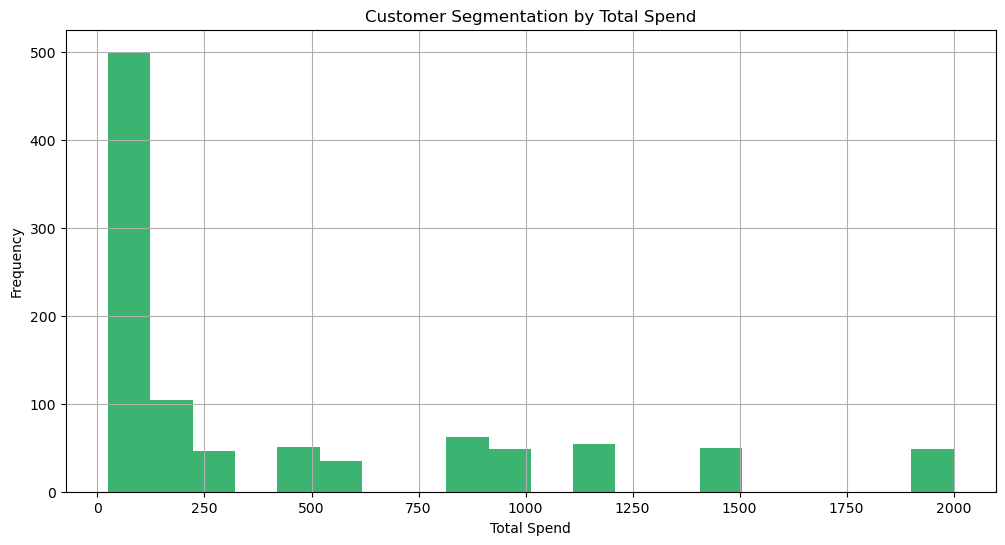

In [55]:
# Plot Customer Segmentation by Total Spend
plt.figure(figsize=(12, 6))
customer_segment['Total Spend'].plot(kind='hist', bins=20, color='mediumseagreen')
plt.title('Customer Segmentation by Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [57]:
# Sales by Gender
sales_by_gender = sales_data.groupby('Gender')['Total Amount'].sum()
print('Sales by Gender:')
print(sales_by_gender)


Sales by Gender:
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


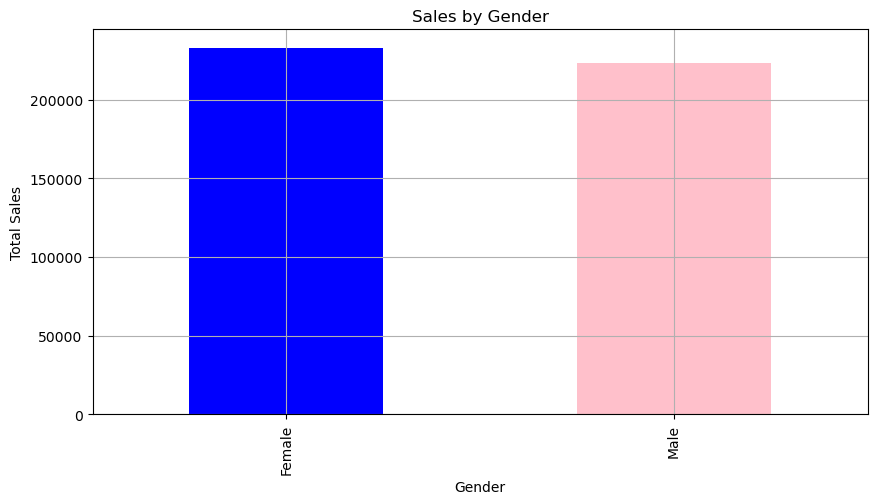

In [59]:
plt.figure(figsize=(10, 5))
sales_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

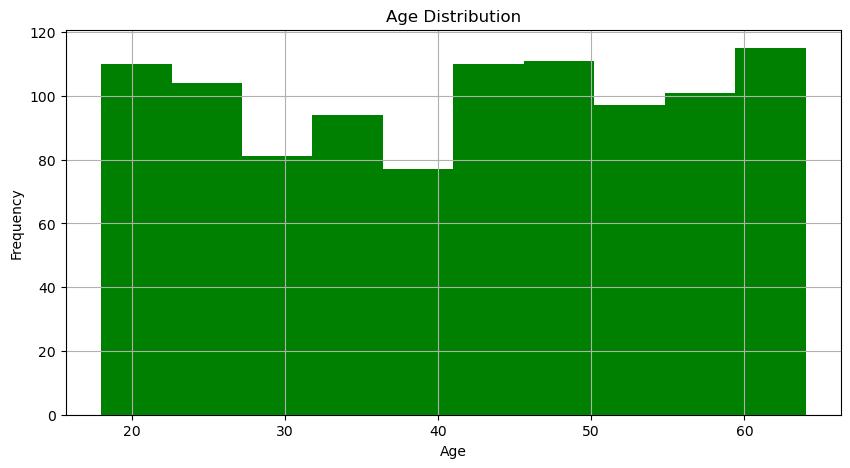

In [63]:
# Age Distribution
plt.figure(figsize=(10, 5))
sales_data['Age'].plot(kind='hist', bins=10, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()